__лабораторная работа N1:__  базовые методы машинного обучения, метрический подход

__часть 1:__ решение задачи классификации

__цель:__ изучить возможности "классических" методов машинного обучения    
      на примере инструментов библиотеки scikit-learn

__порядок выполнения:__ для каждого типа задачи
1. получить/сгенерировать данные 
2. изучить/визуализировать данные
3. применить к ним соответствующий задаче метод,   
4. к результатам модели применить методы оценки  

#  загружаем данные

Scikit-Learn : Dataset loading utilities    
https://scikit-learn.org/stable/datasets.html

UC Irvine Machine Learning Repository    
https://archive.ics.uci.edu

In [1]:
import numpy as np

In [2]:
from sklearn import datasets 

In [3]:
X,y = datasets.load_iris(return_X_y=True, as_frame=False)

In [4]:
X.shape, y.shape

((150, 4), (150,))

# изучение и визуализация данных

SciKit Learn: Decomposition.     
https://scikit-learn.org/stable/modules/decomposition.html

Matplotlib: Quick start guide.      
https://matplotlib.org/stable/users/explain/quick_start.html

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
X2 = PCA(n_components=2).fit_transform(X)
X2.shape

(150, 2)

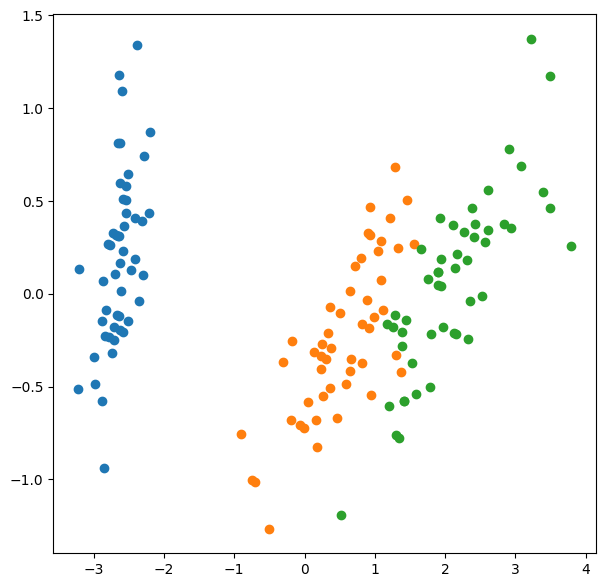

In [8]:
fig,ax = plt.subplots(figsize=(7,7))
for c in sorted(set(y)):
    ax.scatter(X2[y==c,0],X2[y==c,1])

# выделить тестовые данные

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42)
    

In [13]:
X_train.shape, X_test.shape

((135, 4), (15, 4))

# загружаем и обучаем модель классификатора

Scikit-Learn : Nearest Neighbors.    
https://scikit-learn.org/stable/modules/neighbors.html     
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# KNeighborsClassifier?
model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
  ).fit(X_train,y_train)

Scikit-Learn : Model selection: choosing estimators and their parameters.    
https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

In [17]:
# применяем методы поиска оптимальных гиперпараметров модели
from sklearn.model_selection import GridSearchCV

# оценка результатов классификации

Scikit-Learn : Metrics and scoring: quantifying the quality of predictions   
https://scikit-learn.org/stable/modules/model_evaluation.html

In [18]:
from sklearn.metrics import classification_report # метрики качества

In [20]:
y_pred = model.predict(X_test)

In [22]:
# y_pred

In [24]:
# classification_report?

print(classification_report(
    y_true=y_test,
    y_pred=y_pred,
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
from sklearn.metrics import confusion_matrix # количество ошибок
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay